In [3]:
import alternatingStep_Wilson as alt
import numpy as np
import networkx as nx

In [71]:

L = []
n = 6
c = 0
for i in range(1000):
    mat = alt.random_graph(n)
    L.append(alt.alternating_step(graph_laplacian=mat, bd_matrix=np.zeros((n, 2)), bd_set=0)[2])

L = np.sort(np.array(L))

print(L.shape)
print(L)



# sorted_L = np.sort(np.array(L), axis=1)
# print(sorted_L)
# print(np.argsort(sorted_L[:,0]))
# # print(sorted_L[np.argsort(sorted_L[:,2])])
# print(sorted_L[np.argsort(sorted_L[:,0])])

# sorted_L = np.sort(np.array(L), axis=0)
# print(sorted_L)


# sorted_L[:, 0]



(1000, 6)
[[5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5.]
 ...
 [5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5. 5.]]


In [72]:
def unique_check(arr1, arr2, tol=1e-08):
    """Check if two arrays are element-wise equal within a tolerance."""
    return np.alltrue(np.abs(arr1 - arr2) <= tol)


def unique_close(arr, tol=1e-05, return_counts=False):
    """Find the unique rows in a numpy array within a tolerance.

    Parameters
    ----------
    arr : numpy array
        The array to find the unique rows of.
    tol : float, optional
        The tolerance within which two rows are considered equal. Default is 1e-05.
    return_counts : bool, optional
        If True, return the number of times each unique row appears in the array.
        Default is False.

    Returns
    -------
    unique_array : numpy array
        The array of unique rows.
    counts : numpy array
        The number of times each unique row appears in the array. Only returned if
        return_counts is True.
    """

    # sort the array
    arr = np.sort(arr, axis=1)

    length = arr.shape[0]
    arr_copy = arr.copy()
    mask = np.ones(length) == 1

    for i in range(length):
        if mask[i]:  # if this row hasn't matched a previous row yet
            for j in range(i+1, length):
                if np.alltrue(np.abs(arr[i] - arr[j]) <= tol):  # if this row is the same as the next row
                    mask[j] = False
                    arr_copy[j] = arr_copy[i]  # make the close rows identical

    # now that the close ones are equal, we can use np.unique
    unique_array = np.unique(arr_copy, axis=0, return_counts=return_counts)

    return unique_array


In [73]:
unique_close(L, return_counts=True)

(array([[5., 5., 5., 5., 5., 5.]]), array([1000], dtype=int64))

### Run through the algorithm for each n value

In [74]:
number_of_unique = []
distribution = []
for n in range(10, 100):
    L = []
    for i in range(100):
        mat = alt.random_graph(n)
        L.append(alt.alternating_step(graph_laplacian=mat, bd_matrix=np.zeros((n, 2)), bd_set=0)[2])

    L = np.sort(np.array(L))

    distribution.append(unique_close(L, return_counts=True)[1])
    number_of_unique.append(unique_close(L, return_counts=True)[0].shape[0])


KeyboardInterrupt: 

In [151]:
distribution

[array([16,  2,  1, 81], dtype=int64),
 array([ 1,  4,  4,  1, 90], dtype=int64),
 array([ 4, 96], dtype=int64),
 array([ 3,  1,  1, 95], dtype=int64),
 array([ 1, 99], dtype=int64),
 array([ 1, 99], dtype=int64),
 array([ 2, 98], dtype=int64),
 array([ 1, 99], dtype=int64),
 array([100], dtype=int64),
 array([100], dtype=int64),
 array([ 3, 97], dtype=int64),
 array([100], dtype=int64),
 array([ 1, 99], dtype=int64),
 array([100], dtype=int64),
 array([100], dtype=int64),
 array([100], dtype=int64),
 array([100], dtype=int64),
 array([100], dtype=int64),
 array([100], dtype=int64),
 array([100], dtype=int64),
 array([100], dtype=int64),
 array([100], dtype=int64),
 array([100], dtype=int64),
 array([100], dtype=int64),
 array([100], dtype=int64),
 array([100], dtype=int64),
 array([100], dtype=int64),
 array([100], dtype=int64),
 array([100], dtype=int64),
 array([100], dtype=int64),
 array([100], dtype=int64),
 array([100], dtype=int64),
 array([100], dtype=int64),
 array([100], dtyp

In [152]:
number_of_unique

[4,
 5,
 2,
 4,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

### distribution and number of unique for n=2, 3, 4, 5, 6, 7

In [140]:
distribution

[array([100000], dtype=int64),
 array([100000], dtype=int64),
 array([29260, 70740], dtype=int64),
 array([30549, 69451], dtype=int64),
 array([ 2672, 20083,  6810, 70435], dtype=int64),
 array([14607,  3126,  7937, 74330], dtype=int64)]

In [141]:
number_of_unique

[1, 1, 2, 2, 4, 4]

### distribution and number of unique for n=8, 9

In [137]:
distribution

[array([  114,  1623, 11251,  1089,  4916,  1936, 79071], dtype=int64),
 array([  121,   975,   875,  8775,  3223,   106,  2098, 83827],
       dtype=int64)]

In [138]:
number_of_unique

[7, 8]

In [121]:
z = []
n = 4
mat = alt.random_graph(n)

print(mat)
z.append(alt.alternating_step(graph_laplacian=mat, bd_matrix=np.zeros((n, 2)), bd_set=0)[2])
print(z)

[[ 1  0  0 -1]
 [ 0  1 -1  0]
 [ 0 -1  2 -1]
 [-1  0 -1  2]]
[array([3., 3., 3., 3.])]


In [75]:
M = []
n = 4
for i in range(1000):
    mat = alt.random_graph(n)
    M.append(mat)
M = np.array(M)
# print(M)
print(M.shape[0])
print(np.unique(M, axis=0).shape[0])
print(np.unique(M, axis=0))

1000
38
[[[ 1 -1  0  0]
  [-1  2 -1  0]
  [ 0 -1  2 -1]
  [ 0  0 -1  1]]

 [[ 1 -1  0  0]
  [-1  2  0 -1]
  [ 0  0  1 -1]
  [ 0 -1 -1  2]]

 [[ 1 -1  0  0]
  [-1  3 -1 -1]
  [ 0 -1  1  0]
  [ 0 -1  0  1]]

 [[ 1 -1  0  0]
  [-1  3 -1 -1]
  [ 0 -1  2 -1]
  [ 0 -1 -1  2]]

 [[ 1  0 -1  0]
  [ 0  1 -1  0]
  [-1 -1  3 -1]
  [ 0  0 -1  1]]

 [[ 1  0 -1  0]
  [ 0  1  0 -1]
  [-1  0  2 -1]
  [ 0 -1 -1  2]]

 [[ 1  0 -1  0]
  [ 0  2 -1 -1]
  [-1 -1  2  0]
  [ 0 -1  0  1]]

 [[ 1  0 -1  0]
  [ 0  2 -1 -1]
  [-1 -1  3 -1]
  [ 0 -1 -1  2]]

 [[ 1  0  0 -1]
  [ 0  1 -1  0]
  [ 0 -1  2 -1]
  [-1  0 -1  2]]

 [[ 1  0  0 -1]
  [ 0  1  0 -1]
  [ 0  0  1 -1]
  [-1 -1 -1  3]]

 [[ 1  0  0 -1]
  [ 0  2 -1 -1]
  [ 0 -1  1  0]
  [-1 -1  0  2]]

 [[ 1  0  0 -1]
  [ 0  2 -1 -1]
  [ 0 -1  2 -1]
  [-1 -1 -1  3]]

 [[ 2 -1 -1  0]
  [-1  1  0  0]
  [-1  0  2 -1]
  [ 0  0 -1  1]]

 [[ 2 -1 -1  0]
  [-1  2 -1  0]
  [-1 -1  3 -1]
  [ 0  0 -1  1]]

 [[ 2 -1 -1  0]
  [-1  2  0 -1]
  [-1  0  1  0]
  [ 0 -1  0  1]]

 [

In [190]:
Mu = np.unique(M, axis=0)
# print(Mu[0])
print(np.linalg.eig(Mu[0])[0])
print(np.linalg.eig(Mu[1])[0])
def component_number(m, tol=1e-08):
    eigvals = np.linalg.eig(m)[0]
    return m.shape[0] - np.sum(np.abs(eigvals) > tol)


[2. 0. 2. 0.]
[3.41421356e+00 2.00000000e+00 6.21107307e-17 5.85786438e-01]


In [209]:
%timeit m_ = alt.random_graph(100)
# %timeit component_number(m_)

# random_graph(10)
# 59.9 micros for n=10
# 114 micros for n=100

# 0, 6, 10
# 15.1 micros for n=4
# 27.3 micros for n=10
# 67.1 micros for n=20
# 8.79 ms for n=100

114 µs ± 5.6 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


nodes, unique graph laplacians possible, unique influence distributions
2, 1, 1
3, 4, 1
4, 41, 2
5, 768, 2
6, 27114, 4
7, ?, 4
8, ?, 7
9, ?, 8

# Testing Optimality of Result

The 4x4 case

In [7]:
remaining_nodes = np.arange(n)
node_selected = input(f"Select a node {remaining_nodes}")
print(node_selected)
if float(node_selected) not in remaining_nodes:
    print("Invalid node")

print(remaining_nodes)

0


In [54]:
remaining_nodes = np.arange(n)
matiboi = np.zeros((n, 2))
matiboi[0][0] = 1
matiboi[1][0] = 1
matiboi[2][1] = 1
print(matiboi)
print(matiboi[:].sum(axis=1))
print(remaining_nodes)
print(remaining_nodes[matiboi.sum(axis=1) == 0])
remaining_nodes[(matiboi[:].sum(axis=1) == 1)]

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 0.]]
[1. 1. 1. 0.]
[0 1 2 3]
[0 1 2]


array([0, 1, 2])

# The Game:

In [3]:
# Set up the graph
n = 7
mat = alt.random_graph(n)
print(mat)

[[ 2 -1 -1  0  0  0  0]
 [-1  3  0  0  0 -1 -1]
 [-1  0  1  0  0  0  0]
 [ 0  0  0  1 -1  0  0]
 [ 0  0  0 -1  2  0 -1]
 [ 0 -1  0  0  0  1  0]
 [ 0 -1  0  0 -1  0  2]]


In [3]:
# 7x7 graph laplacian where the nodes are in a row
n = 7
ex6 = np.array([[1, -1, 0, 0, 0, 0, 0],
                [-1, 2, -1, 0, 0, 0, 0],
                [0, -1, 2, -1, 0, 0, 0],
                [0, 0, -1, 2, -1, 0, 0],
                [0, 0, 0, -1, 2, -1, 0],
                [0, 0, 0, 0, -1, 2, -1],
                [0, 0, 0, 0, 0, -1, 1]])
mat = ex6

In [8]:
bd_matrix = np.zeros((n, 2))
remaining_nodes = np.arange(n)
nodes = np.arange(n)
node_selected = -1
for i in range(4):
    if i % 2 == 0: # Your turn
        while float(node_selected) not in remaining_nodes:
            node_selected = input(f"Select a node {remaining_nodes}")
        bd_matrix, max_node, total_influence, influence_val = alt.alternating_step_2(graph_laplacian=mat, bd_matrix=bd_matrix, bd_set=0, node_to_add=int(node_selected))

        print(f"You selected {max_node} which brings the score to\n "
              f"You: {influence_val + 1 + i // 2} \n "
              f"Greedy: {n - (influence_val + 1 + i // 2)}")


    else:  # Greedy turn
        bd_matrix, max_node, total_influence, influence_val = alt.alternating_step_2(graph_laplacian=mat, bd_matrix=bd_matrix, bd_set=1)
        print(f"Greedy selected {max_node} which brings the score to\n "
              f"You: {n - (influence_val + 1 + i // 2)} \n "
              f"Greedy: {influence_val + 1 + i // 2}")

    remaining_nodes = nodes[bd_matrix.sum(axis=1) == 0]



You selected 2 which brings the score to
 You: 7.0 
 Greedy: 0.0
Greedy selected 3 which brings the score to
 You: 3.0 
 Greedy: 4.0
You selected 4 which brings the score to
 You: 6.0 
 Greedy: 1.0
Greedy selected 1 which brings the score to
 You: 4.0 
 Greedy: 3.0


In [4]:
bd_matrix = np.zeros((n, 2))
print(alt.alternating_step_2(graph_laplacian=mat, bd_matrix=bd_matrix, bd_set=0))

(array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]]), 3, array([6., 6., 6., 6., 6., 6.]), array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]]))


In [63]:
print(bd_matrix)

[[1. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]]


In [10]:
remaining_nodes = np.arange(0, 20, 3)
print(remaining_nodes)
print(np.argwhere(remaining_nodes == 6)[0][0])

[ 0  3  6  9 12 15 18]
2


Graph with 7 nodes and 6 edges


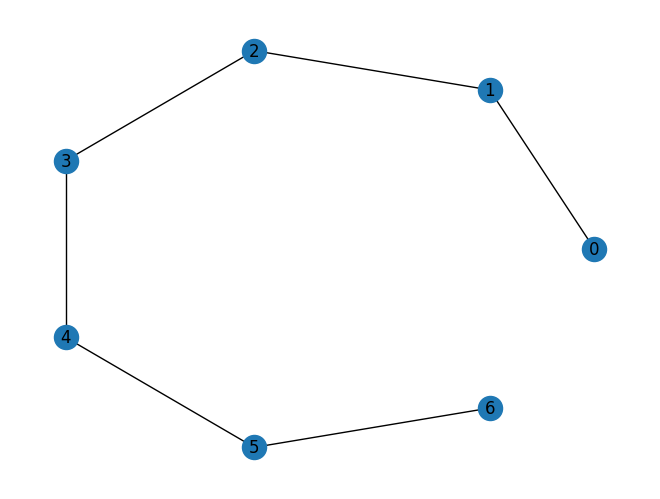

In [60]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a network
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (4, 6)])

# Draw the network
# nx.draw(G, with_labels=True)

mat = -np.array([[0, -1, 0, 0, 0, 0, 0],
                [-1, 0, -1, 0, 0, 0, 0],
                [0, -1, 0, -1, 0, 0, 0],
                [0, 0, -1, 0, -1, 0, 0],
                [0, 0, 0, -1, 0, -1, 0],
                [0, 0, 0, 0, -1, 0, -1],
                [0, 0, 0, 0, 0, -1, 0]])

print(nx.Graph(mat))
pos = nx.circular_layout(nx.Graph(mat))
nx.draw(nx.Graph(mat), pos=pos, with_labels=True)
# plt.show()

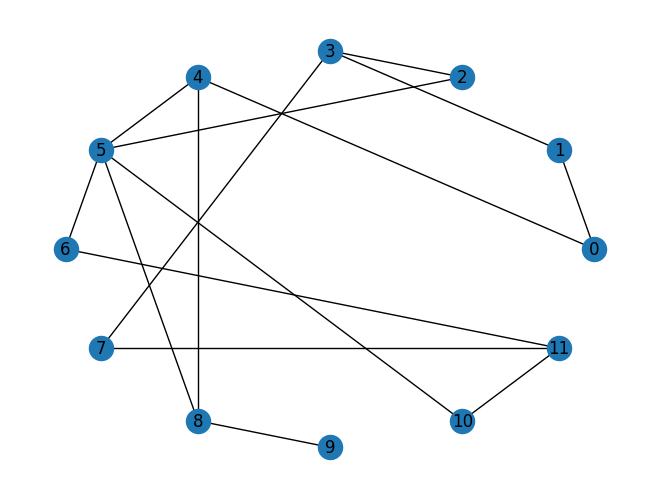

In [7]:
ex5 = np.array([[0, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0],
                [-1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0],
                [0, -1, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0],
                [-1, 0, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0],
                [0, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0],
                [0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1],
                [0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1],
                [0, 0, 0, 0, -1, -1, 0, 0, 0, -1, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0],
                [0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1],
                [0, 0, 0, 0, 0, 0, -1, -1, 0, 0, -1, 0]])
# put 0s on the diagonals of ex5 and make its entries nonnegative
ex0 = ex5 - np.diag(ex5.diagonal())
ex0 = -ex0

pos = nx.circular_layout(nx.Graph(ex0))
nx.draw(nx.Graph(ex0), pos=pos, with_labels=True)

In [12]:
test = np.zeros((12, 2))
test[0, 0] = 1
test[1, 1] = 1
test[5, 0] = 1
mask = test[:, 0] == 0
print(test[:, 0])
mask &= test[:, 1] == 0
print(mask)

[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[False False  True  True  True False  True  True  True  True  True  True]


In [13]:
import numpy as np

def asvoid(arr):
    """View the array as dtype np.void (bytes)
    This collapses ND-arrays to 1D-arrays, so you can perform 1D operations on them.
    https://stackoverflow.com/a/16216866/190597 (Jaime)"""
    arr = np.ascontiguousarray(arr)
    return arr.view(np.dtype((np.void, arr.dtype.itemsize * arr.shape[-1])))

def find_index(arr, x):
    arr_as1d = asvoid(arr)
    x = asvoid(x)
    return np.nonzero(arr_as1d == x)[0]




In [14]:
arr = np.array([[  1,  15,   0,   0],
                [ 30,  10,   0,   0],
                [ 30,  20,   0,   0],
                [1, 2, 3, 4],
                [104, 139, 146,  75],
                [  9,  11, 146,  74],
                [  9, 138, 146,  75]], dtype='uint8')

arr = np.tile(arr,(1221488,1))
x = np.array([1,2,3,4], dtype='uint8')

print(find_index(arr, x))

[      3      10      17 ... 8550398 8550405 8550412]


In [57]:
rando = np.random.randint(0, 8550420)
split = 8550420 - rando

rando_arr = np.random.randint(0, 1000, size=(rando, 4))
split_arr = np.random.randint(0, 1000, size=(split, 4))

rando_arr = np.concatenate((rando_arr, [[1, 2, 3, 4.5]]), axis=0)

arr = np.concatenate((rando_arr, split_arr), axis=0)
print(arr)
print(rando)
x = np.array([1,2,3,4.5], dtype='float64')
arr = np.array(arr, dtype='float64')
print(arr.dtype)
print(find_index(arr, x))

[[424. 669. 182. 499.]
 [218. 179. 278. 497.]
 [410. 650. 211. 345.]
 ...
 [294. 735. 233. 197.]
 [735. 384. 717.  67.]
 [596.  78. 271.  81.]]
2592363
float64
[2592363]
